In [2]:
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
age_mean = data.Age.mean()
age_mean

29.69911764705882

In [6]:
pe = data.Name.str.split(",").str[1].str.split(".").str[0].str.strip()
data.insert(4 , 'Prefix', value = pe)
data

,PassengerId,Survived,Pclass,Name,Prefix,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",Mr,male,26.0,0,0,111369,30.0000,C148,C


In [55]:
Age1 =data[data.loc[:,'Prefix']=='Master']
Age1[Age1.Age.isnull()]
agein = Age1[Age1.Age.isnull()].index


In [56]:
data.loc[agein,'Age']=Age1.Age.mean()

In [57]:
data.Age.fillna(age_mean , inplace = True)
data.Age.isnull().sum()

0

In [9]:
total = data.Survived.value_counts().tolist()

In [7]:
sur1 = data.groupby('Sex').Survived.sum().index.tolist()
sur = data.groupby('Sex').Survived.sum().tolist()
sur

[233, 109]

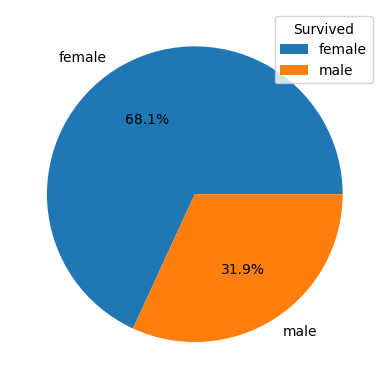

In [110]:
plt.pie(sur ,labels = sur1, autopct='%1.1f%%' )
plt.legend(title = "Survived")

<BarContainer object of 2 artists>

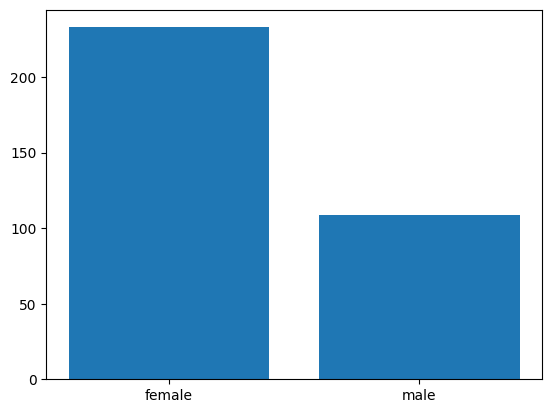

In [13]:
plt.bar(sur1, sur)

C:\Users\manan\AppData\Local\Temp\ipykernel_9744\2740814848.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ch.set_xticklabels(("Pclass_1",'Pclass_2',"Pclass_3"))


[Text(0, 0, 'Pclass_1'), Text(1, 0, 'Pclass_2'), Text(2, 0, 'Pclass_3')]

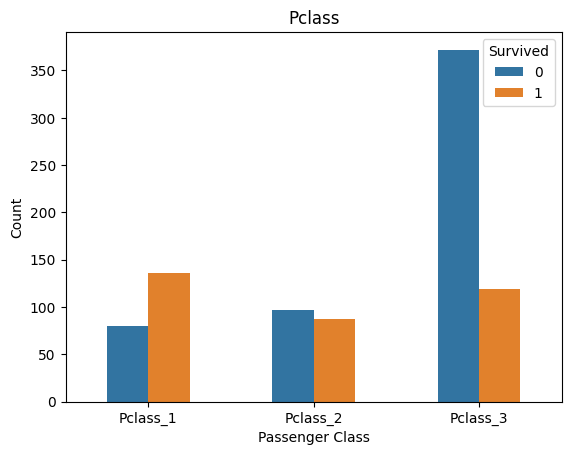

In [29]:
ch= sns.countplot(data,x='Pclass',width=0.5, hue='Survived')
ch.set_title("Pclass")
ch.set_xlabel("Passenger Class")
ch.set_ylabel("Count")
ch.set_xticklabels(("Pclass_1",'Pclass_2',"Pclass_3"))

In [14]:
df_mr= data[data.loc[:,'Prefix']=='Mr']

In [15]:
df_mr[df_mr.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Prefix,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",Mr,male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",Mr,male,NaN,0,0,244373,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",Mr,male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",Mr,male,NaN,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",Mr,male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",Mr,male,NaN,0,0,11774,29.7000,C47,C
846,847,0,3,"Sage, Mr. Douglas Bullen",Mr,male,NaN,8,2,CA. 2343,69.5500,NaN,S
859,860,0,3,"Razi, Mr. Raihed",Mr,male,NaN,0,0,2629,7.2292,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",Mr,male,NaN,0,0,345777,9.5000,NaN,S


In [16]:
mr_ind= df_mr[df_mr.Age.isnull()].index

In [17]:
data.loc[mr_ind,'Age']=df_mr.Age.mean()

In [19]:
data.loc[mr_ind,'Age']

5      32.36809
17     32.36809
26     32.36809
29     32.36809
36     32.36809
         ...   
839    32.36809
846    32.36809
859    32.36809
868    32.36809
878    32.36809
Name: Age, Length: 119, dtype: float64